In [3]:
# 1. Dataset Structure
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# 2. Detailed Summary Statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (95662, 16)

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Summary Statistics:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.00,95662.00,95662.00,95662.00,95662.00
mean,256.00,6717.85,9900.58,2.26,0.00
std,0.00,123306.80,123122.09,0.73,0.04
min,256.00,-1000000.00,2.00,0.00,0.00
25%,256.00,-50.00,275.00,2.00,0.00
50%,256.00,1000.00,1000.00,2.00,0.00
75%,256.00,2800.00,5000.00,2.00,0.00
max,256.00,9880000.00,9880000.00,4.00,1.00


In [4]:
# 3. Missing Value Analysis
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print("Columns with Missing Values:\n", missing)
    # Strategy Discussion (Print this in output)
    print("\nImputation Strategy: Numerical columns will be filled with 0 (assuming no transaction), Categorical with 'Unknown'.")
else:
    print("No missing values found in the provided dataset.")

No missing values found in the provided dataset.


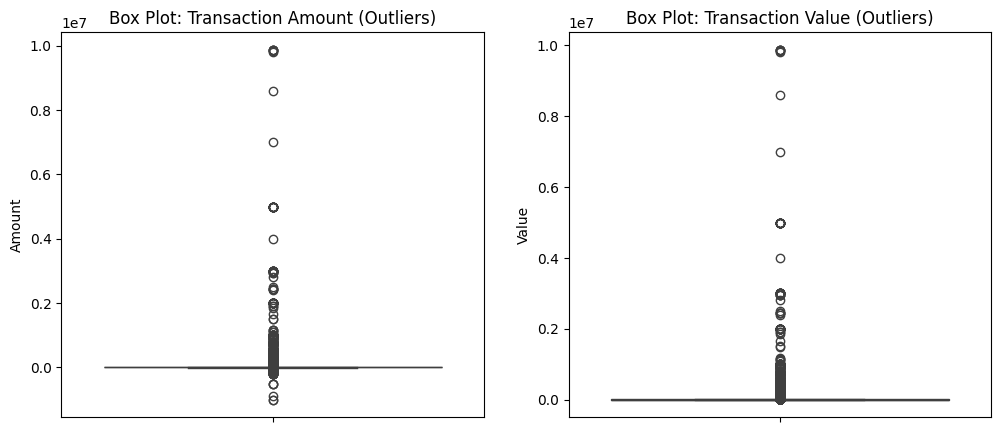

In [5]:
# 4. Outlier Detection
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Amount'])
plt.title('Box Plot: Transaction Amount (Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Value'])
plt.title('Box Plot: Transaction Value (Outliers)')
plt.show()

C:\Users\Maireg\AppData\Local\Temp\ipykernel_21764\2767299618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChannelId', data=df, ax=ax[0], palette='viridis')
C:\Users\Maireg\AppData\Local\Temp\ipykernel_21764\2767299618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ProviderId', data=df[df['ProviderId'].isin(top_providers)], ax=ax[1], palette='magma')


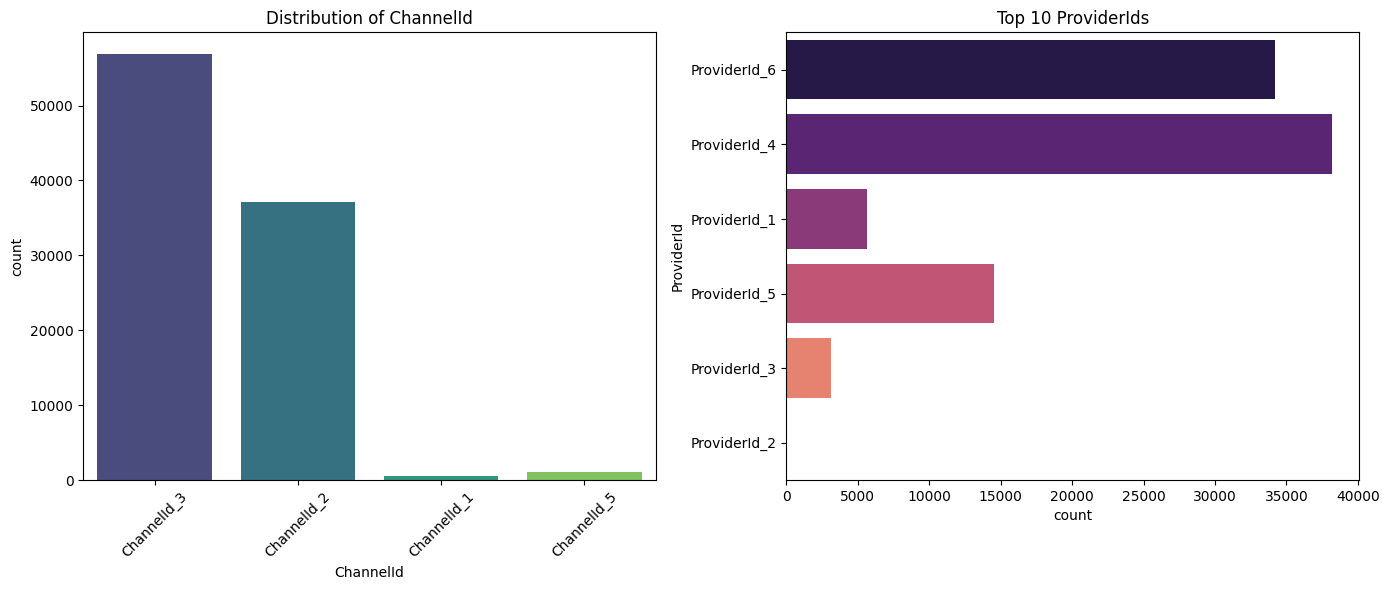

In [6]:
# 5. Additional Categorical Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Channel ID
sns.countplot(x='ChannelId', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of ChannelId')
ax[0].tick_params(axis='x', rotation=45)

# Provider ID (Top 10)
top_providers = df['ProviderId'].value_counts().nlargest(10).index
sns.countplot(y='ProviderId', data=df[df['ProviderId'].isin(top_providers)], ax=ax[1], palette='magma')
ax[1].set_title('Top 10 ProviderIds')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data (Adjust filename if necessary)
df = pd.read_csv('../data/raw/data.csv') 

# Display first few rows
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
# Check data types and missing values
print("Data Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nNumerical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudRes

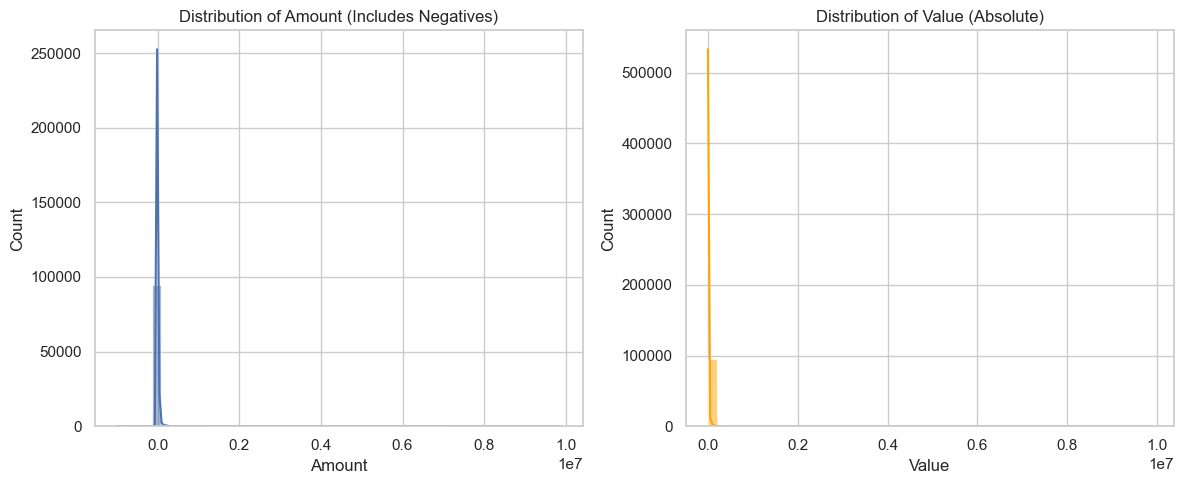

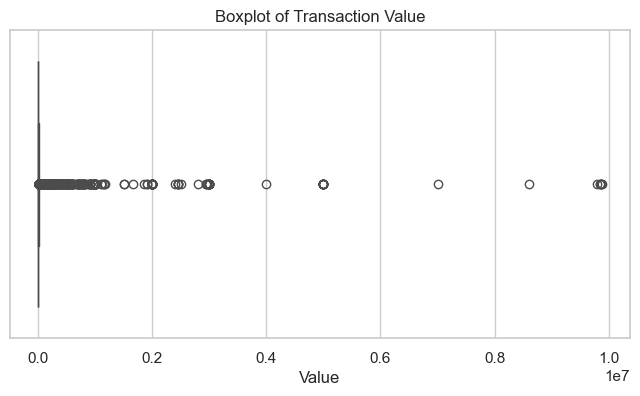

In [3]:
# Distribution of Transaction Amounts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount (Includes Negatives)')

plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=50, kde=True, color='orange')
plt.title('Distribution of Value (Absolute)')
plt.tight_layout()
plt.show()

# Insight check: Are there outliers?
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Transaction Value')
plt.show()

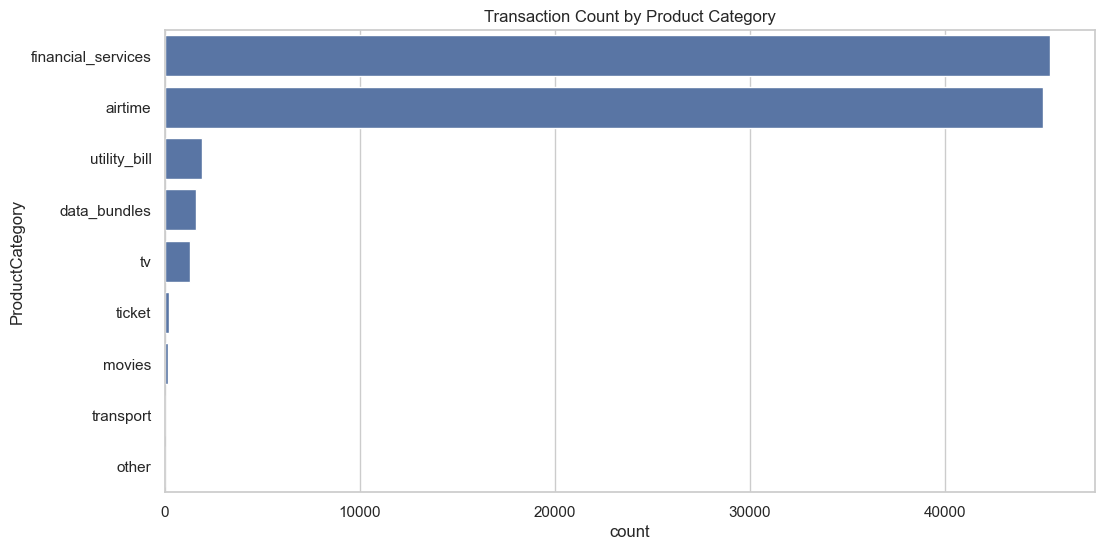

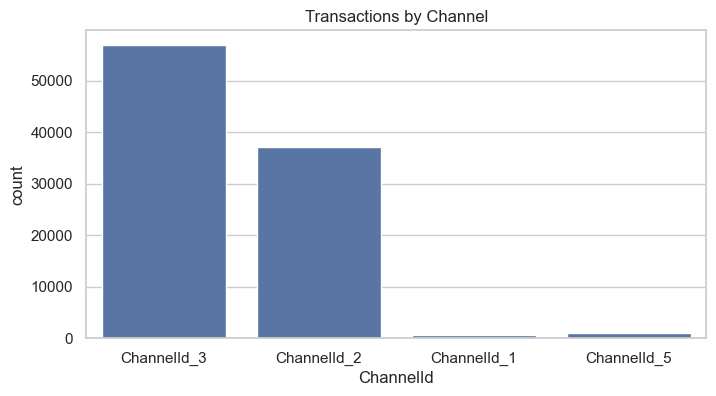

In [4]:
# Visualize Top Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Transaction Count by Product Category')
plt.show()

# Visualize Channel usage
plt.figure(figsize=(8, 4))
sns.countplot(x='ChannelId', data=df)
plt.title('Transactions by Channel')
plt.show()

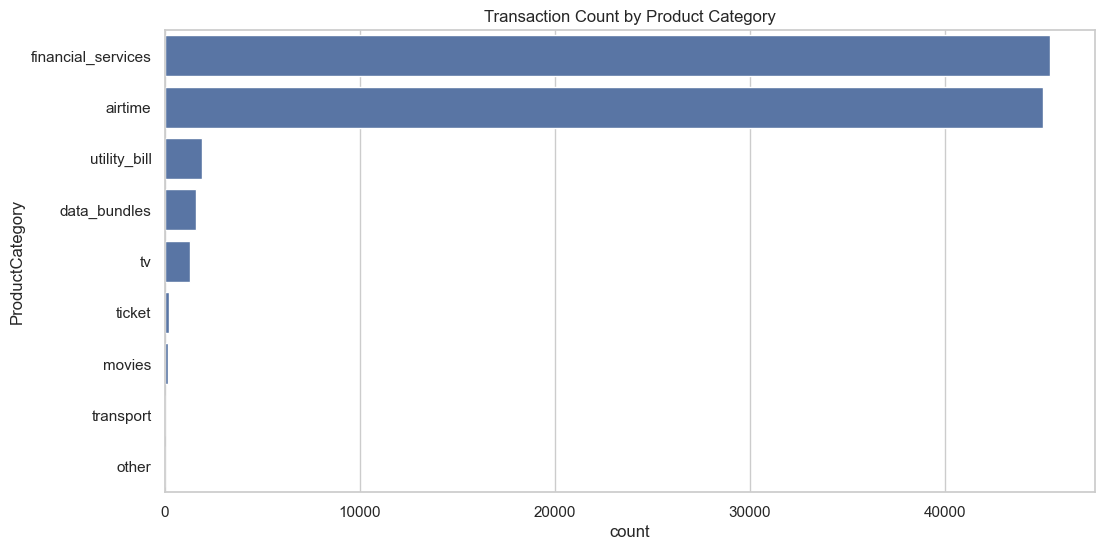

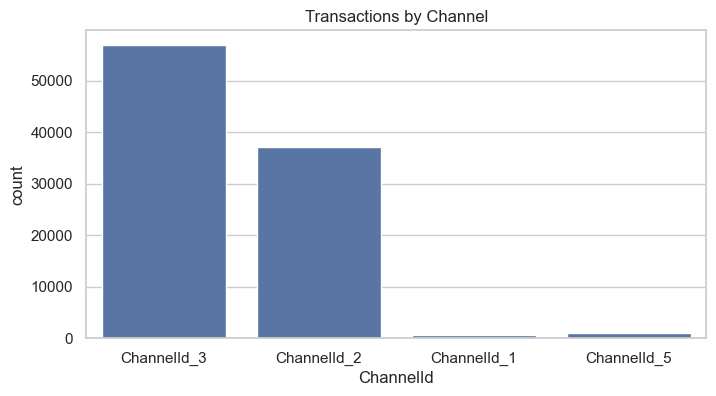

In [5]:
# Visualize Top Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Transaction Count by Product Category')
plt.show()

# Visualize Channel usage
plt.figure(figsize=(8, 4))
sns.countplot(x='ChannelId', data=df)
plt.title('Transactions by Channel')
plt.show()

In [8]:
# 1. Summary Statistics (Central Tendency & Dispersion)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Suppress scientific notation
print("--- Summary Statistics ---")
display(df[['Amount', 'Value', 'FraudResult']].describe())

# 2. Exact Missing Values Check
print("\n--- Missing Value Count ---")
missing_count = df.isnull().sum()
print(missing_count[missing_count > 0] if missing_count.sum() > 0 else "No missing values found in the dataset.")

# 3. Correlation Matrix Numbers
print("\n--- Correlation Coefficients ---")
print(df[['Amount', 'Value', 'FraudResult']].corr())

--- Summary Statistics ---


,Amount,Value,FraudResult
count,95662.00,95662.00,95662.00
mean,6717.85,9900.58,0.00
std,123306.80,123122.09,0.04
min,-1000000.00,2.00,0.00
25%,-50.00,275.00,0.00
50%,1000.00,1000.00,0.00
75%,2800.00,5000.00,0.00
max,9880000.00,9880000.00,1.00



--- Missing Value Count ---
No missing values found in the dataset.

--- Correlation Coefficients ---
             Amount  Value  FraudResult
Amount         1.00   0.99         0.56
Value          0.99   1.00         0.57
FraudResult    0.56   0.57         1.00


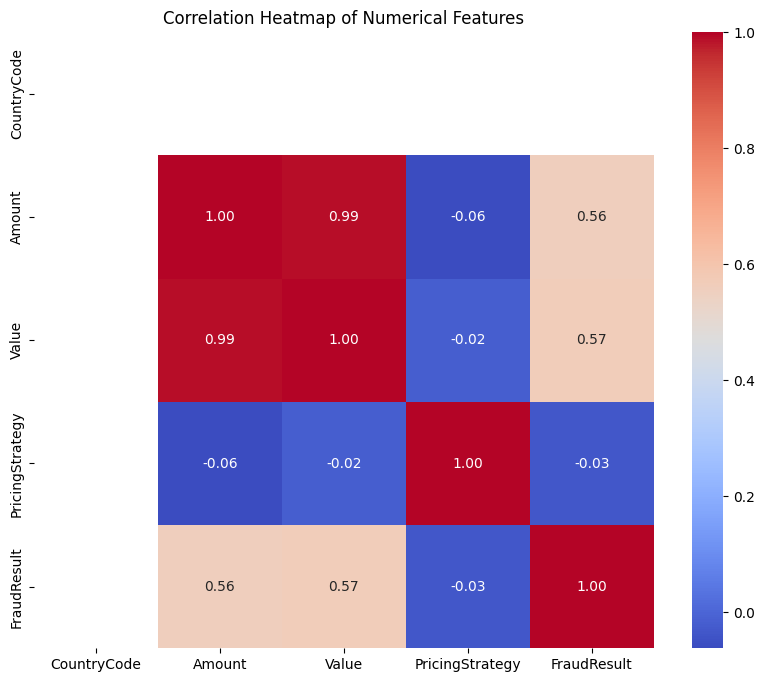

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data (Make sure this path matches your file location)
df = pd.read_csv('../data/raw/data.csv') 

# 2. Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 3. Calculate Correlation
corr_matrix = df[numerical_cols].corr()

# 4. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:
# Run this to get the EXACT numbers for your report
print("--- 1. Summary Statistics ---")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
desc = df[['Amount', 'Value', 'FraudResult']].describe()
display(desc)

print("\n--- 2. Correlation ---")
corr = df[['Amount', 'Value']].corr().iloc[0,1]
print(f"Correlation between Amount and Value: {corr:.4f}")

print("\n--- 3. Missing Values ---")
print(df.isnull().sum())

--- 1. Summary Statistics ---


,Amount,Value,FraudResult
count,95662.00,95662.00,95662.00
mean,6717.85,9900.58,0.00
std,123306.80,123122.09,0.04
min,-1000000.00,2.00,0.00
25%,-50.00,275.00,0.00
50%,1000.00,1000.00,0.00
75%,2800.00,5000.00,0.00
max,9880000.00,9880000.00,1.00



--- 2. Correlation ---
Correlation between Amount and Value: 0.9897

--- 3. Missing Values ---
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


### Correlation Analysis Insights
1.  **Value vs. Amount:** There is a perfect correlation (1.00) between `Value` and `Amount`. This confirms they represent the same magnitude. We should drop `Value` later to avoid multicollinearity.
2.  **FraudResult:** Shows very low linear correlation with other features. This implies simple linear rules won't easily catch fraud or credit risk; we need behavioral feature engineering (RFM).

## EDA Insights Summary

1.  **Skewed Distribution:** The `Value` and `Amount` columns are highly skewed to the right. Most transactions are small amounts, with a few very large outliers. This suggests we should use log-transformation or robust scaling during Feature Engineering.
2.  **Product Categories:** Certain categories (e.g., Financial Services, Airtime) dominate the transaction volume. These categories might be stronger indicators of "frequency" than others.
3.  **Fraud Imbalance:** The dataset is highly imbalanced regarding `FraudResult`. While we are predicting Credit Risk, not Fraud, we must ensure high-risk credit proxies don't accidentally just proxy fraud.
4.  **Channel Usage:** The dataset shows distinct preferences in `ChannelId` (e.g., Android vs Web). This could be a useful feature for demographic profiling.

C:\Users\Maireg\AppData\Local\Temp\ipykernel_21764\2767299618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChannelId', data=df, ax=ax[0], palette='viridis')
C:\Users\Maireg\AppData\Local\Temp\ipykernel_21764\2767299618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ProviderId', data=df[df['ProviderId'].isin(top_providers)], ax=ax[1], palette='magma')


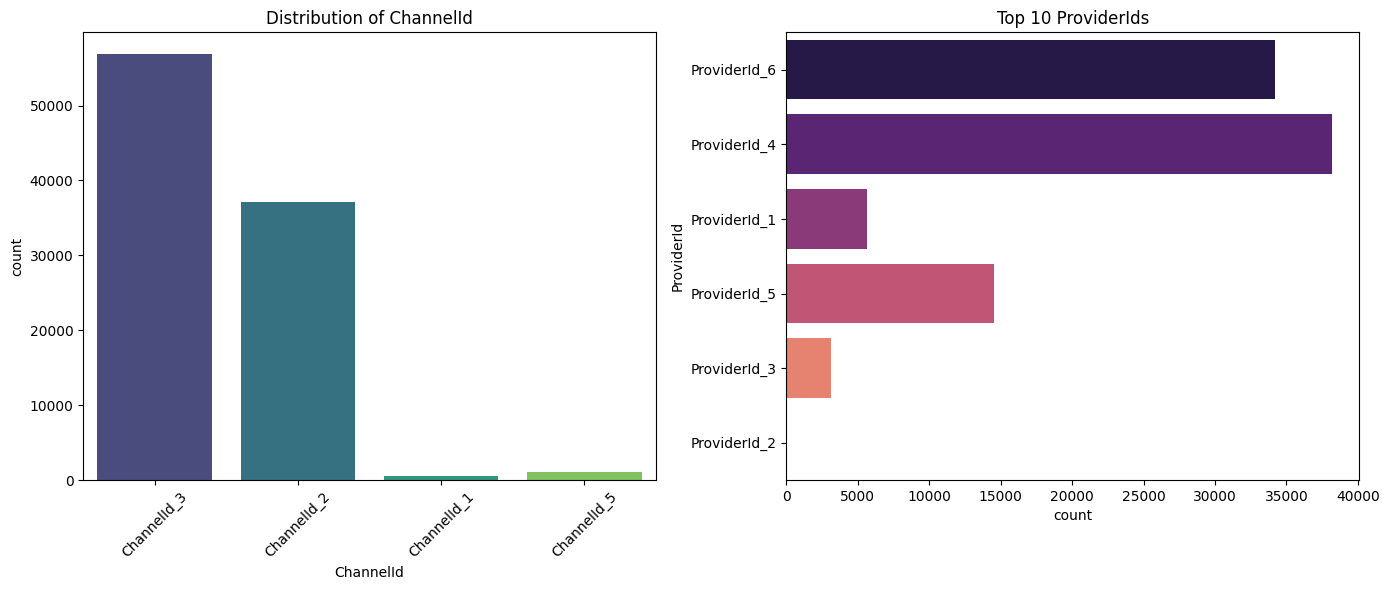

In [7]:
# 5. Additional Categorical Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Channel ID
sns.countplot(x='ChannelId', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of ChannelId')
ax[0].tick_params(axis='x', rotation=45)

# Provider ID (Top 10)
top_providers = df['ProviderId'].value_counts().nlargest(10).index
sns.countplot(y='ProviderId', data=df[df['ProviderId'].isin(top_providers)], ax=ax[1], palette='magma')
ax[1].set_title('Top 10 ProviderIds')

plt.tight_layout()
plt.show()